# Explainable Artificial Intelligence (XAI)

<br>

We will be using the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/nilanjansamanta1210/airline-passenger-satisfaction) from Kaggle. The dataset contains information about passengers' satisfaction with the airline service. The goal is to predict whether a passenger is satisfied or not based on the features provided. 

## Data Loading and Preprocessing

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import kagglehub
import utils
import os

c:\Users\perei\miniconda3\envs\xai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = "data/airline_passenger_satisfaction.csv"

if not os.path.exists(dataset_path):
        print("Downloading dataset...")
        path = kagglehub.dataset_download("nilanjansamanta1210/airline-passenger-satisfaction")
        downloaded_file = os.path.join(path, "airline_passenger_satisfaction.csv")
        if os.path.exists(downloaded_file):
            os.rename(downloaded_file, dataset_path)
        else:
            raise FileNotFoundError("The dataset was not downloaded properly. Please check the Kaggle dataset.")

df = pd.read_csv(dataset_path)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
df = utils.pre_process_df(df, drop_correlated=False)
df

,Age,Class,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,...,In-flight Entertainment,Baggage Handling,Satisfaction,Total Delay,Female,Male,First-time,Returning,Business,Personal
0,48,2,821,3,3,4,3,3,3,5,...,5,5,0,7,0,1,1,0,1,0
1,35,2,821,2,2,3,5,2,5,4,...,5,5,1,65,1,0,0,1,1,0
2,41,2,853,4,4,4,5,4,3,5,...,3,3,1,0,0,1,0,1,1,0
3,50,2,1905,2,2,3,4,2,5,5,...,5,5,1,0,0,1,0,1,1,0
4,49,2,3470,3,3,3,5,3,3,4,...,3,3,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,1,447,4,4,4,4,2,5,1,...,4,4,0,5,0,1,0,1,0,1
129876,41,1,308,5,3,5,3,4,5,2,...,2,5,0,0,0,1,0,1,0,1
129877,42,1,337,5,2,4,2,1,3,3,...,3,5,0,20,0,1,0,1,0,1
129878,50,1,337,4,4,3,4,1,4,4,...,3,5,1,53,0,1,0,1,0,1


In [4]:
# Check column types
non_numeric_columns = []
cols_w_missing_values = []

for col in df.columns:
    if not pd.api.types.is_integer_dtype(df[col]):
        non_numeric_columns.append((col, df[col].dtype))
    if df[col].isnull().sum() > 0:
        cols_w_missing_values.append(col)

# Print result
if len(non_numeric_columns) == 0:
    print("All columns are int or float.\n")
else:
    print("There are columns that are not int:")
    for col, dtype in non_numeric_columns:
        print(f"Column: {col}, Type: {dtype}")
        
        
if len(cols_w_missing_values) == 0:
    print("No columns have missing values.")
else:
    print("Columns with missing values:")
    for col in cols_w_missing_values:
        print(f"Column: {col}")

All columns are int or float.

No columns have missing values.


## Data Analysis

We will analyze the data to understand the relationships between the features and the target variable. We will also check for class imbalance and feature distributions.

<br>

### Correlation Analysis

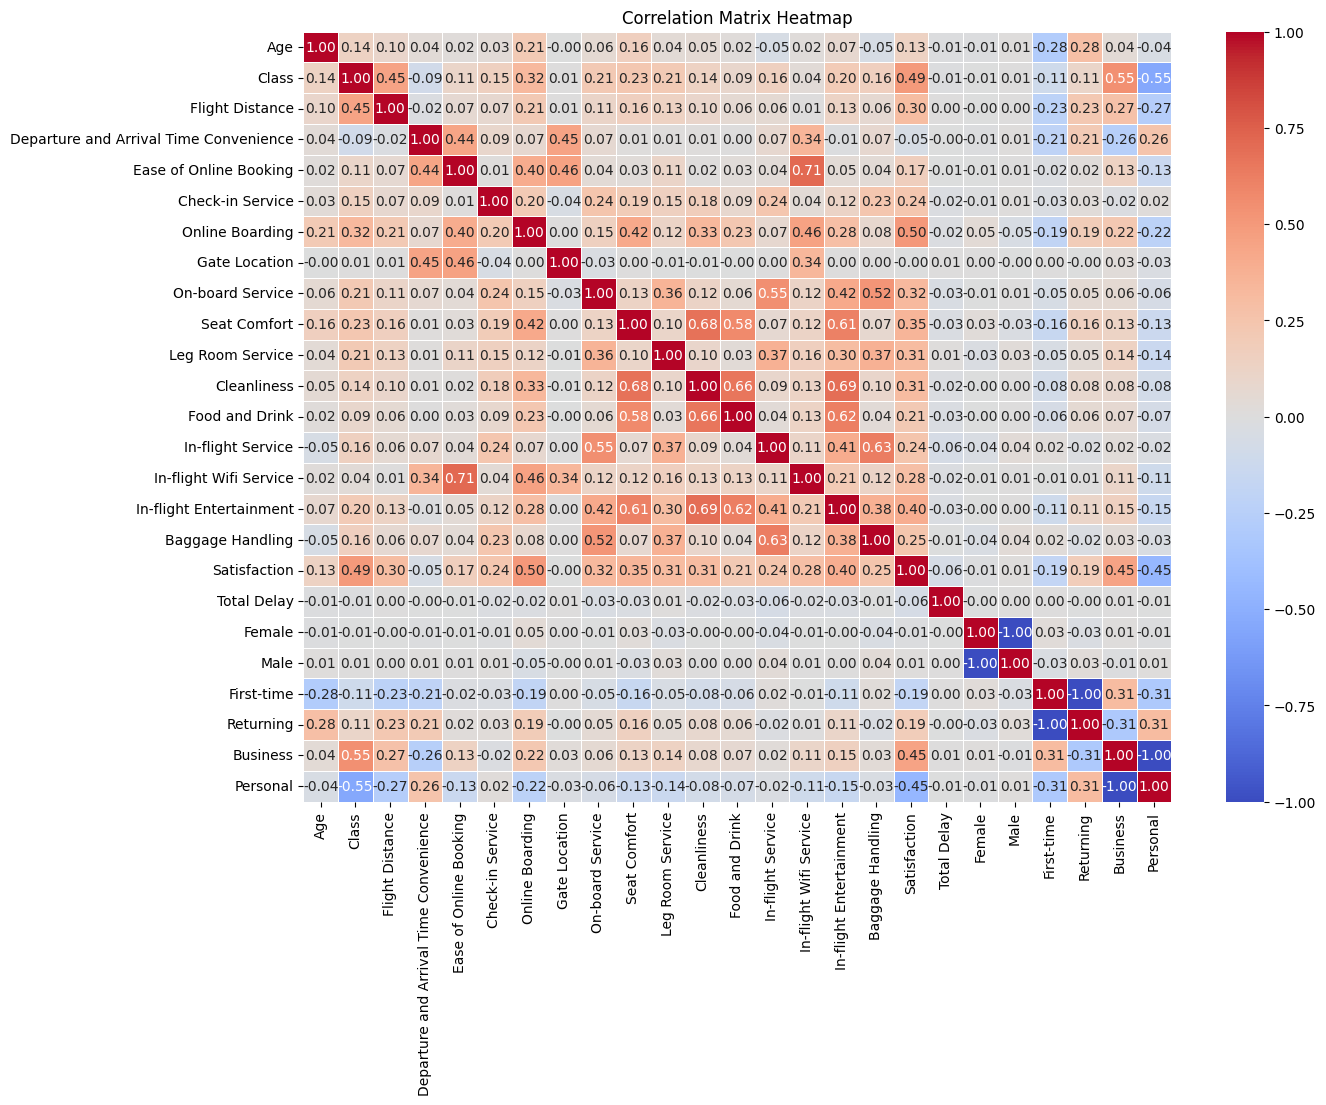

In [5]:
utils.visualize_correlation(df)

Accuracy of the model **without removing** highly correlated features:
- Holdout Accuracy: 94.664%
- Cross-Validation Accuracy: 94.642%

Join of Departure and Arrival Delay
- Holdout Accuracy: 94.649%
- Cross-Validation Accuracy: 94.675%

<br>

Accuracy of the model **removing** highly correlated features:

- Holdout Accuracy: 94.256%
- Cross-Validation Accuracy: 94.25%

Join of Departure and Arrival Delay
- Holdout Accuracy: 94.387%
- Cross-Validation Accuracy: 94.171%


A remoção de informações correlacionadas pode ter prejudicado o modelo, eliminando dados importantes, mesmo que redundantes. Isso sugere que, neste caso, a redundância nas features era benéfica.

A junção das duas features como Total Delay não causou um impacto significativo no desempenho geral, mas ajudou a simplificar o modelo sem sacrificar a performance.

### Class Imbalance

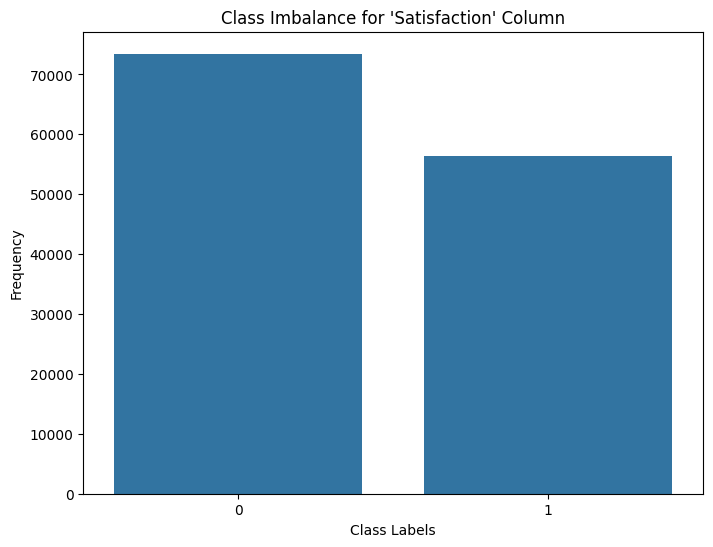

In [6]:
# Verify class imbalance of the Target

utils.visualize_class_imbalance(df)

As we see there is an imbalance in the classes. We will SMOTE to balance the classes.

### Feature distribution

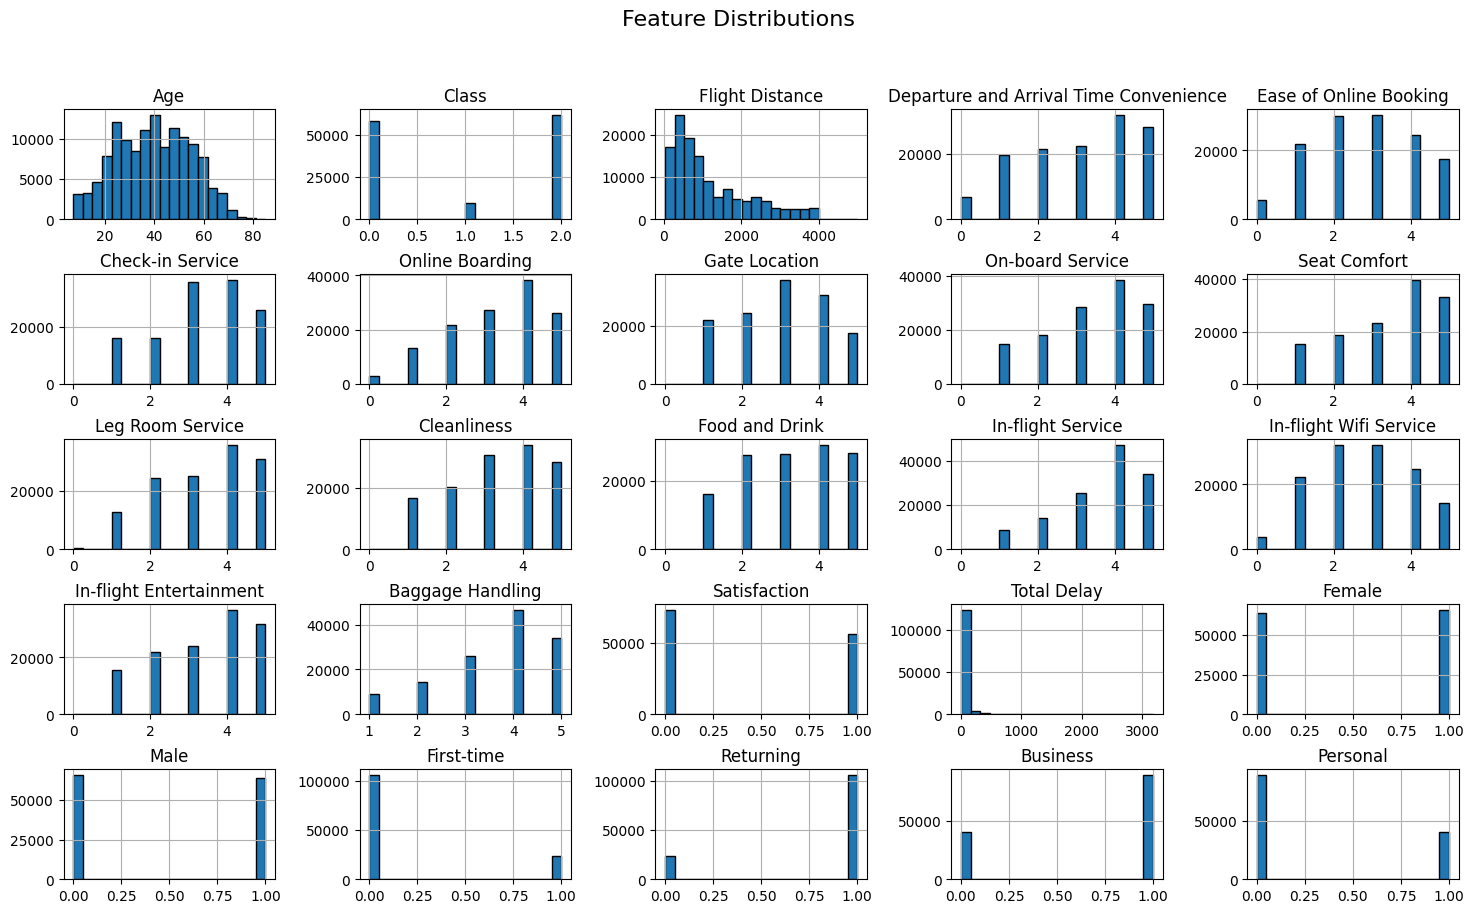

In [7]:
utils.visualize_feature_distributions(df)

## Simple Classifications

We will start by using a glass box and a black box model to classify the data. We chose a Decision Tree and a Random Forest as the models, respectively. We will analyze the performance of the models and then apply XAI techniques to explain the predictions.

In [8]:
X = df.drop(columns=["Satisfaction"])
y = df["Satisfaction"]


### Decision Tree

The decision tree is a glass box model that is easy to interpret. We will use it to classify the data and then apply XAI techniques to explain the predictions.

In [9]:
tree = DecisionTreeClassifier(random_state=42)

accuracy = utils.holdout_accuracy(X,y, tree, test_size=0.2)
cv_score = utils.cross_validation_acc(X,y, tree, cv_fold=10)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Holdout Accuracy: 94.649%
Cross-Validation Accuracy: 94.675%


Tree Depth: 37
Number of Leaves: 3946
Number of Nodes: 7891
Internal Nodes: 3945
Leaf Nodes: 3946


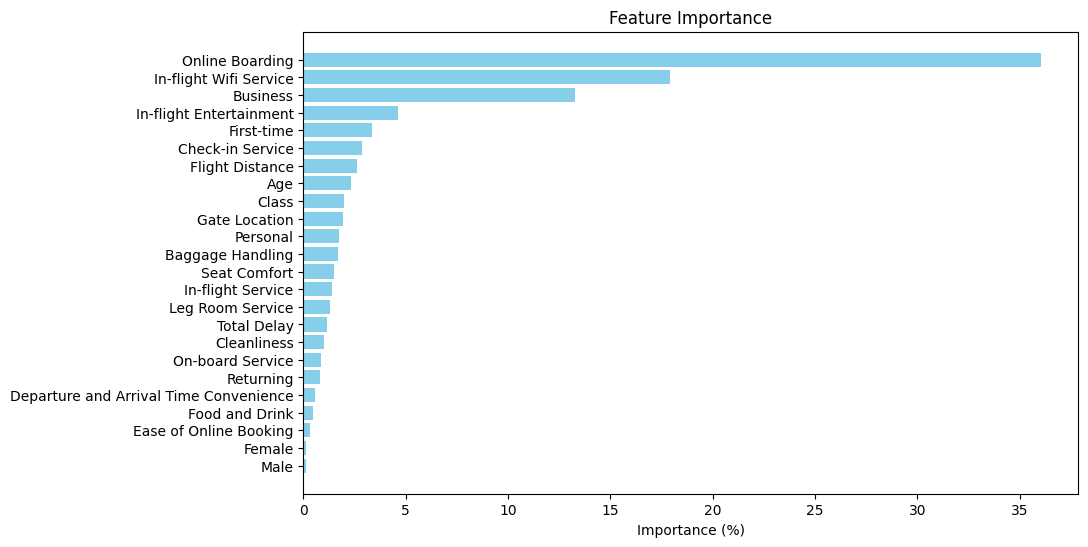

In [10]:
utils.analyze_tree_complexity(feature_names=X.columns.tolist(),tree=tree)

### Random Forest

The random forest is a black box model that is more complex than the decision tree. Like with the decision tree, we will classify the data and then apply XAI techniques to explain the predictions.

In [11]:
forest = RandomForestClassifier(random_state=42)

accuracy = utils.holdout_accuracy(X,y, tree, test_size=0.2)
cv_score = utils.cross_validation_acc(X,y, tree, cv_fold=10)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Holdout Accuracy: 94.649%
Cross-Validation Accuracy: 94.675%


### **Task 3.1: One simplification-based technique**
**Surrogate models-** A ideia é treinar um modelo interpretável mais simples (como uma árvore de decisão ou regressão linear) para aproximar as decisões de um modelo complexo. Os modelos surrogates ajudam a entender como o modelo original toma suas decisões sem a necessidade de entender todo o seu comportamento interno.

**Rule Extraction-** A ideia é extrair um conjunto de regras a partir do modelo complexo, como uma Random Forest, para torná-lo mais interpretável.

In [12]:
utils.apply_surrogate_models_xai(X,y,forest)

Surrogate Model Accuracy: 88.293%


In [13]:
feature_summary, pruned_rules_df = utils.apply_rule_extraction_xai(forest,df)

Number of rules per class:
predicted_class
0    82159
1    43797
dtype: int64

Feature frequency in rules:
                                        frequency
In-flight Wifi Service                     172475
Online Boarding                            162775
Age                                        123360
Flight Distance                            122333
Ease of Online Booking                     109397
Seat Comfort                               108434
In-flight Entertainment                    100665
In-flight Service                           98361
Check-in Service                            97927
Baggage Handling                            97252
On-board Service                            97067
Leg Room Service                            93703
Total Delay                                 90175
Cleanliness                                 88533
Class                                       84461
Food and Drink                              66376
Departure and Arrival Time Convenience     

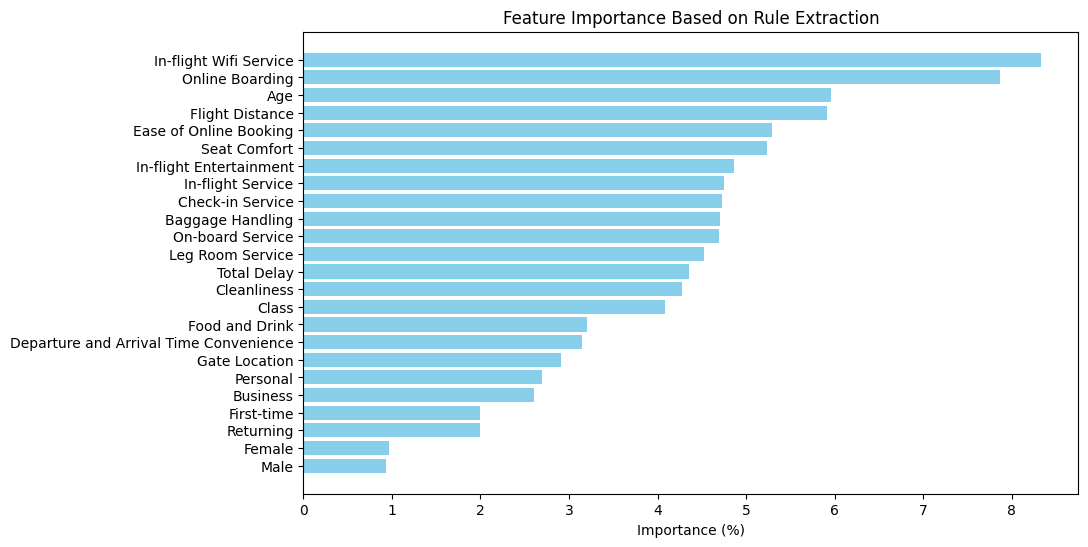

In [14]:
utils.plot_feature_importance_from_rules(feature_summary)

In [15]:
# utils.evaluate_rule_extraction_accuracy(pruned_rules_df,df)

### **Task 3.2: Feature-based techniques**

- **Feature Importance-** Measures the importance of a variable by checking how much the model's accuracy drops when the values ​​of that variable are shuffled.
If shuffling greatly reduces accuracy, the variable is important to the model.

- **LIME-** Focuses on explaining how the model makes decisions for an individual sample, showing the impact of each feature on the prediction for that instance, while the surrogate model tries to understand the global behavior of the model.

- **SHAP-** 

Permutation Importance:
In-flight Wifi Service                    0.144855
Online Boarding                           0.045514
Check-in Service                          0.034814
Baggage Handling                          0.033468
Seat Comfort                              0.033281
In-flight Service                         0.029312
Cleanliness                               0.025383
Business                                  0.022053
Class                                     0.021341
On-board Service                          0.014342
Age                                       0.014171
Leg Room Service                          0.011835
Flight Distance                           0.011330
In-flight Entertainment                   0.011077
Personal                                  0.010948
Total Delay                               0.010126
Ease of Online Booking                    0.006889
Gate Location                             0.005658
First-time                                0.004182
Returni

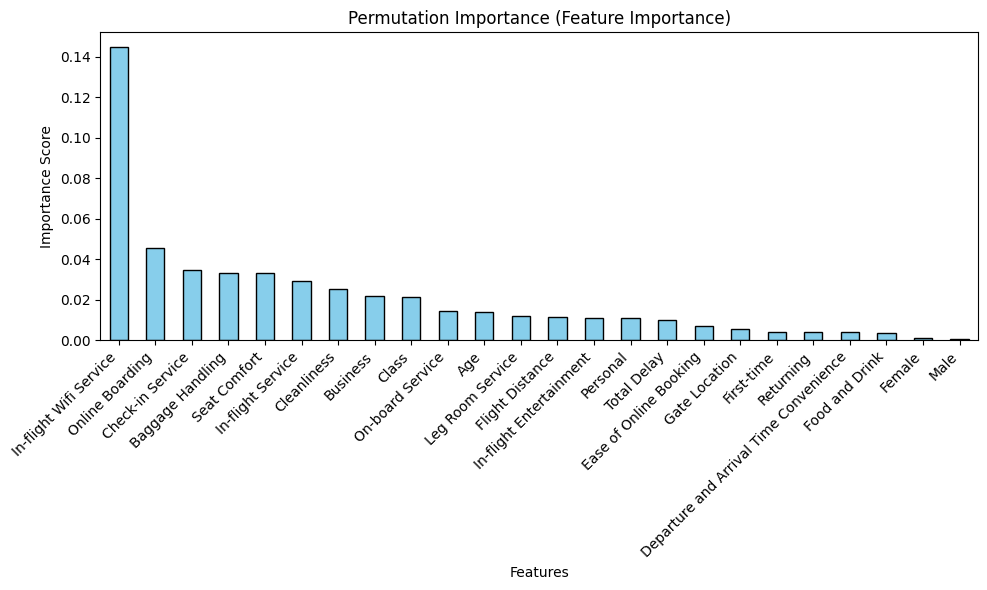

In [16]:
utils.apply_permutation_importance_xai(X,y,forest)

Explanation for sample index: 0


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


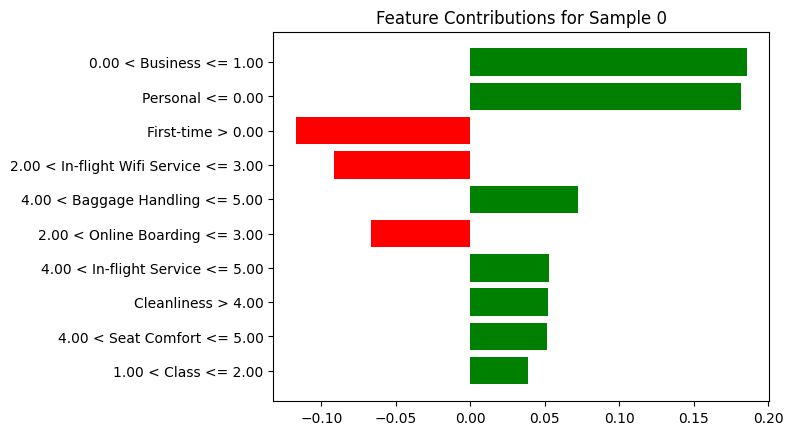

In [17]:
utils.apply_lime_xai(X,forest,0)

In [18]:
# utils.apply_shap_xai(X,y,forest)

In [19]:
# utils.apply_simplification_based_xai(X,y,forest)